# 13.6 Lab: Multiple Testing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.metrics import confusion_matrix
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import TukeyHSDResults

import json

%matplotlib inline


## 13.6.1 Review of Hypothesis Tests

In [3]:
np.random.seed(21)
X = np.random.normal(loc=0.0, scale=1.0, size=(10, 100))
offset = 0.5
X[:,:50] = X[:,:50] + offset

In [4]:
# here I used scipy. During google search, I came across bioinfokit module, could explore more. 
result=st.ttest_1samp(a = X[:, 0], popmean = 0)
print(result.pvalue)

0.01345182155946442


In [5]:
# let us run the same t-test for all 100 columns
p_values = []
decision = []
for i in range(100):
    result=st.ttest_1samp(a = X[:, i], popmean = 0)
    p_values.append(result.pvalue)
    if result.pvalue < 0.05:
        decision.append('Reject H0')
    else:
        decision.append('Do not reject H0')


In [6]:
# after computing the p-values, we can use the ground truth to evaluate the performance
ground_truth = np.repeat(['Reject H0', 'Do not reject H0'], [50, 50], axis=0)
labels = ['Reject H0', 'Do not reject H0']
cm = confusion_matrix (ground_truth, decision, labels=labels)
print(cm)

[[18 32]
 [ 2 48]]


/Users/xqiuping/opt/anaconda3/envs/python356/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """
/Users/xqiuping/opt/anaconda3/envs/python356/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


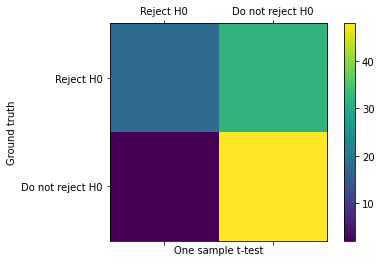

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('One sample t-test')
plt.ylabel('Ground truth')
plt.show()

In [8]:
# we could make the offset larger (from 0.5 to 1) and see the change to the confusion matrix
offset = 1
X[:,:50] = X[:,:50] + offset

p_values = []
decision = []
for i in range(100):
    result=st.ttest_1samp(a = X[:, i], popmean = 0)
    p_values.append(result.pvalue)
    if result.pvalue < 0.05:
        decision.append('Reject H0')
    else:
        decision.append('Do not reject H0')


ground_truth = np.repeat(['Reject H0', 'Do not reject H0'], [50, 50], axis=0)
labels = ['Reject H0', 'Do not reject H0']
cm = confusion_matrix (ground_truth, decision, labels=labels)
print(cm)

[[50  0]
 [ 2 48]]


## 13.6.2 The Family-Wise Error Rate

In [9]:
m = range(500)
fwe1 = list(map(lambda x:1 - pow(1 - 0.05,x),m))
fwe2 = list(map(lambda x:1 - pow(1 - 0.01,x),m))
fwe3 = list(map(lambda x:1 - pow(1 - 0.001,x),m))



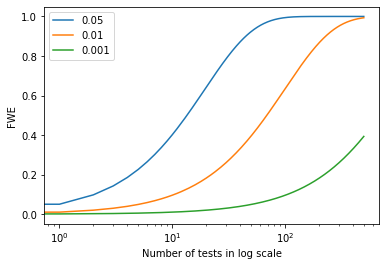

' \nWe see that setting α = 0.05 results in a high FWER even for moderate m. \nWith α = 0.01, we can test no more than five null hypotheses before the FWER exceeds 0.05. \nOnly for very small values, such as α = 0.001, do we manage to ensure a small FWER, \nat least for moderately-sized m.\n\nOf course, the problem with setting α to such a low value is that we are likely to \nmake a number of Type II errors: in other words, our power is very low.\n'

In [10]:
plt.plot(m, fwe1, label = "0.05")
plt.plot(m, fwe2, label = "0.01")
plt.plot(m, fwe3, label = "0.001")
plt.xlabel('Number of tests in log scale')
plt.ylabel('FWE')
plt.xscale("log")
plt.legend()
plt.show()
""" 
We see that setting α = 0.05 results in a high FWER even for moderate m. 
With α = 0.01, we can test no more than five null hypotheses before the FWER exceeds 0.05. 
Only for very small values, such as α = 0.001, do we manage to ensure a small FWER, 
at least for moderately-sized m.

Of course, the problem with setting α to such a low value is that we are likely to 
make a number of Type II errors: in other words, our power is very low.
"""

In [11]:
Fund = pd.read_csv('data/Fund.csv')

In [12]:
Fund.head()

,Manager1,Manager2,Manager3,Manager4,Manager5,Manager6,Manager7,Manager8,Manager9,Manager10,...,Manager1991,Manager1992,Manager1993,Manager1994,Manager1995,Manager1996,Manager1997,Manager1998,Manager1999,Manager2000
0,-3.341992,-4.167469,9.389223,8.417220,0.997863,7.191473,-10.767592,4.072425,1.575264,-0.798505,...,-2.948706,10.350706,-2.855337,-4.431786,0.739544,0.198044,1.752188,-1.534710,-3.359419,6.585654
1,3.759627,12.525254,3.403366,0.143944,-7.222227,0.067747,-10.737053,-1.138185,-7.166604,4.778522,...,24.003150,-1.966606,-1.609109,1.405325,4.717175,1.540359,-12.218233,-0.073008,-8.547683,-2.382629
2,12.970091,-2.581061,-0.824734,6.584604,17.050241,1.857130,3.196942,-7.981362,-1.214148,2.338250,...,-2.926914,6.420147,8.946921,3.449013,1.009957,1.481369,14.203314,0.005562,-5.105035,2.292429
3,-4.874630,7.981743,-4.026743,-4.731946,0.503276,0.740187,-28.969410,4.683751,-0.568840,-4.000547,...,-3.112208,3.173581,-6.017109,-1.984873,1.022525,-2.261927,19.345970,-1.048299,-0.016154,1.196832
4,2.019279,-5.370236,-4.854669,10.594432,-6.891574,9.877838,1.430033,9.840311,5.311455,18.365094,...,7.173653,-9.157211,7.643125,-1.022339,-1.325865,2.848785,-6.642081,2.488612,0.032060,-7.510032


In [13]:
# we will do the one sample t test for the first manager
result=st.ttest_1samp(a = Fund['Manager1'], popmean = 0)
print(result.pvalue)

0.0062023554855382464


In [14]:
p_values = []
manager_number = 5 

for i in range(manager_number):
    result=st.ttest_1samp(a = Fund.iloc[:,i], popmean = 0)
    p_values.append(result.pvalue)

print(p_values)

""" 
The p-values are low for Managers One and Three, and high for the other three managers. 
However, we cannot simply reject H01 and H03, since this would fail to account for 
the multiple testing that we have performed. 
Instead, we will conduct Bonferroni’s method and Holm’s method to control the FWER.
"""

[0.0062023554855382464, 0.9182711516514123, 0.011600982682500436, 0.6005396008061651, 0.7557815084668168]


' \nThe p-values are low for Managers One and Three, and high for the other three managers. \nHowever, we cannot simply reject H01 and H03, since this would fail to account for \nthe multiple testing that we have performed. \nInstead, we will conduct Bonferroni’s method and Holm’s method to control the FWER.\n'

In [15]:
# we could bonferroni to adjust the raw p-values and take care of family wise error rate
reject, p_values_corrected, alphacSidak, alphacBonf = multipletests(p_values, method = 'bonferroni')
print(p_values_corrected)
""" 
Therefore, using Bonferroni’s method, 
we are able to reject the null hypothesis only for Manager One while controlling the FWER at 0.05.
This information is also available in the variable reject.
"""
print(reject)


[0.03101178 1.         0.05800491 1.         1.        ]
[ True False False False False]


In [16]:
# Bonferroni's method is more conservative. We could apply holm's method to control the FWER
reject, p_values_corrected, alphacSidak, alphacBonf = multipletests(p_values, method = 'holm')
print(p_values_corrected)
print(reject)
""" 
By contrast, using Holm’s method, the adjusted p-values indicate that we can reject the null hypotheses 
for Both Managers One and Three at a FWER of 0.05.
"""

[0.03101178 1.         0.04640393 1.         1.        ]
[ True False  True False False]


' \nBy contrast, using Holm’s method, the adjusted p-values indicate that we can reject the null hypotheses \nfor Both Managers One and Three at a FWER of 0.05.\n'

In [17]:
# we can see the average for each manager 
Fund.mean(axis=0)

Manager1       3.000000
Manager2      -0.100000
Manager3       2.800000
Manager4       0.500000
Manager5       0.300000
                 ...   
Manager1996   -0.026088
Manager1997    0.911164
Manager1998    0.366860
Manager1999   -0.389842
Manager2000    0.196968
Length: 2000, dtype: float64

In [18]:
# next, we could test whether 2 managers are significantly different. For example Manager 1 and Manager 2
result=st.ttest_rel(a = Fund['Manager1'], b = Fund['Manager2'])
print(result.pvalue)

0.038391072368079586


In [19]:
""" 
However, we decided to perform this test only after examining the data and 
noting that Managers One and Two had the highest and lowest mean performances. 
In a sense, this means that we have implicitly performed a manual selection 
from the 5(5 − 1)/2 = 10 hypothesis tests, rather than just one. 
Hence, we use Tukey’s method in order to adjust for multiple testing. 
"""
returns = Fund.iloc[:, :5].to_numpy().flatten(order='F') # we flatten by col (i.e. order='F')
manager = np.repeat(['1', '2', '3', '4', '5'], repeats=Fund.shape[0])

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=returns, groups=manager, alpha=0.05)

print(tukey)

""" 
Notice that the p-value for the difference between Managers One and Two has increased from 0.038 to 0.186, 
so there is no longer clear evidence of a difference between the managers’ performances.

"""

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     -3.1 0.1861 -6.9866 0.7866  False
     1      3     -0.2    0.9 -4.0866 3.6866  False
     1      4     -2.5 0.3962 -6.3866 1.3866  False
     1      5     -2.7 0.3152 -6.5866 1.1866  False
     2      3      2.9 0.2452 -0.9866 6.7866  False
     2      4      0.6    0.9 -3.2866 4.4866  False
     2      5      0.4    0.9 -3.4866 4.2866  False
     3      4     -2.3 0.4825 -6.1866 1.5866  False
     3      5     -2.5 0.3962 -6.3866 1.3866  False
     4      5     -0.2    0.9 -4.0866 3.6866  False
---------------------------------------------------


' \nNotice that the p-value for the difference between Managers One and Two has increased from 0.038 to 0.186, \nso there is no longer clear evidence of a difference between the managers’ performances.\n\n'

## 13.6.3 The False Discovery Rate

In [20]:
p_values = []
manager_number = Fund.shape[1]

for i in range(manager_number):
    result=st.ttest_1samp(a = Fund.iloc[:,i], popmean = 0)
    p_values.append(result.pvalue)

print(p_values[0:10])

[0.0062023554855382464, 0.9182711516514123, 0.011600982682500436, 0.6005396008061651, 0.7557815084668168, 0.0009645725984591884, 0.004651524304645147, 0.001397802525898444, 0.002604065138148157, 0.0027967384364455815]


In [21]:
""" 
There are far too many managers to consider trying to control the FWER. 
Instead, we focus on controlling the FDR: that is, the expected fraction of rejected null 
hypotheses that are actually false positives. 
"""
reject, p_values_corrected, alphacSidak, alphacBonf = multipletests(p_values, method = 'fdr_bh')
print(p_values_corrected[0:10])
""" 
The q-values output by the Benjamini-Hochberg procedure can be interpreted as the smallest 
FDR threshold at which we would reject a particular null hypothesis.

For instance, a q-value of 0.1 indicates that we can reject the corresponding null hypothesis
at an FDR of 10% or greater, but that we cannot reject the null hypothesis at an FDR below 10%.
"""

[0.08988921 0.991491   0.12211561 0.92342997 0.95603587 0.07513802
 0.0767015  0.07513802 0.07513802 0.07513802]


' \nThe q-values output by the Benjamini-Hochberg procedure can be interpreted as the smallest \nFDR threshold at which we would reject a particular null hypothesis.\n\nFor instance, a q-value of 0.1 indicates that we can reject the corresponding null hypothesis\nat an FDR of 10% or greater, but that we cannot reject the null hypothesis at an FDR below 10%.\n'

In [22]:
# we would find that 146 of the 2,000 fund managers have a p_values_corrected below 0.1
sum(p_values_corrected <= .1)

146

In [23]:
# if we use bonferroni method, we will find None
sum(np.array(p_values) <= .1/Fund.shape[1])

0

## 13.6.4 A Re-Sampling Approach

In [24]:
# I saved the gene expression data as a json file, in python we could load the json file using the json library
# after reading in the data, we can use the data is same as a dictionary, we can use the keys to access the data

f = open('./data/Khan.json')
Khan = json.load(f)

X_train = np.array(Khan['xtrain'])
y_train = np.array(Khan['ytrain'])
X_test = np.array(Khan['xtest'])
y_test = np.array(Khan['ytest'])

In [25]:
x = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
unique, counts = np.unique(y, return_counts=True)
print(counts)

[11 29 18 25]


In [26]:
# x1: take the x for cancer type == 2
# x2: take the x for cancer type == 4
x1 = x[y==2, :]
x2 = x[y==4, :]
n1 = x1.shape[0]
n2 = x2.shape[0]
print(n1)
print(n2)

29
25


In [27]:
# Performing a standard two-sample t-test on the 11th (gene_index = 10 in python) gene produces a test-statistic 
gene_index = 10
original_result=st.ttest_ind(a=x1[:,gene_index], b=x2[:,gene_index], equal_var=True)
print(original_result.statistic)
print(original_result.pvalue)
""" 
The 2 sample t-test produces a test-statistic of −2.09 and an associated p-value of 0.0412, 
suggesting modest evidence of a difference in mean expression levels between the two cancer types.
"""

-2.0936596339807076
0.04118396795367345


' \nThe 2 sample t-test produces a test-statistic of −2.09 and an associated p-value of 0.0412, \nsuggesting modest evidence of a difference in mean expression levels between the two cancer types.\n'

In [28]:
""" 
Instead of doing a parameterized 2 sample t-test, we could do a non-parameterized test(i.e. permutation test).
we can randomly split the 54 patients (in cancer group 2 and 4) into two groups of 29 and 25 
(same as the original split),and compute a new test statistic. 
Under the null hypothesis of no difference between the groups, this new test statistic should have 
the same distribution as our original one. 
Repeating this process many (i.e.10,000) times allows us to approximate the null distribution of the test statistic. 
We compute the fraction of the time that our observed test statistic exceeds the test statistics obtained 
via re-sampling.
"""
np.random.seed(21)
iteration = 10000
test_stats = []
x_temp = np.concatenate((x1[:,gene_index], x2[:,gene_index]), axis=0)

for i in range(iteration):
    np.random.shuffle(x_temp)
    result_temp = st.ttest_ind(a=x_temp[:n1], b=x_temp[-n2:], equal_var=True)
    test_stats.append(result_temp.statistic)

In [29]:
print(np.mean((np.abs(test_stats) >= np.abs(original_result.statistic))))

""" 
This fraction is our re-sampling-based p-value. It is almost identical to the p-value of 0.0412 
obtained using the theoretical null distribution.

The reason for this is that the parametrized distribution is a pretty good assumption in this case
To see this, we can plot the histogram of the re-sampled statistics vs. parametrized distribution. 

We could try other genes (i.e. gene_index = 876) to see its theoretical and re-sampling null distributions are 
quite different
"""

0.0421


' \nThis fraction is our re-sampling-based p-value. It is almost identical to the p-value of 0.0412 \nobtained using the theoretical null distribution.\n\nThe reason for this is that the parametrized distribution is a pretty good assumption in this case\nTo see this, we can plot the histogram of the re-sampled statistics vs. parametrized distribution. \n\nWe could try other genes (i.e. gene_index = 876) to see its theoretical and re-sampling null distributions are \nquite different\n'

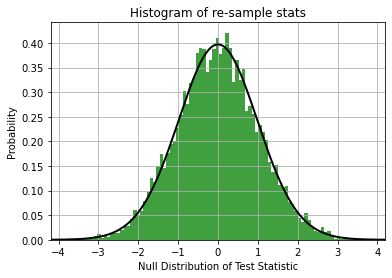

In [30]:
# construct the t distribution 
df = n1 + n2 - 2
rv = st.t(df)
x = np.linspace(-4.2, 4.2, 1000)


plt.hist(test_stats, 100, density=True, facecolor='g', alpha=0.75)
plt.plot(x, rv.pdf(x), 'k-', lw=2)
plt.xlabel('Null Distribution of Test Statistic')
plt.ylabel('Probability')
plt.title('Histogram of re-sample stats')
plt.xlim(-4.2, 4.2)
plt.grid(True)
plt.show()

In [31]:
# we could do this for 100 and see how FDR works under re-sample 
# it would be good to use small iterations to make sure the code runs okay 
num_gene = 100
iteration = 500
test_stats_matrix = []
test_stats_origin = []

for j in range(num_gene):
    gene_index = j 
    x_temp = np.concatenate((x1[:,gene_index], x2[:,gene_index]), axis=0)
    result_origin = st.ttest_ind(a=x1[:,gene_index], b=x2[:,gene_index], equal_var=True)
    test_stats_origin.append(result_origin.statistic)
    test_stats = []
    for i in range(iteration):
        np.random.shuffle(x_temp)
        result_temp = st.ttest_ind(a=x_temp[:n1], b=x_temp[-n2:], equal_var=True)
        test_stats.append(result_temp.statistic)
        
    test_stats_matrix.append(test_stats)

In [32]:
test_stats_origin_sorted =  np.sort(np.abs(test_stats_origin))

In [33]:
Rs = []
Vs = []
FDRs = []
for j in range(num_gene):
    R = np.sum(np.abs(test_stats_origin) >= test_stats_origin_sorted[j])
    V = np.sum(np.abs(test_stats_matrix) >= test_stats_origin_sorted[j]) / iteration
    Rs.append(R)
    Vs.append(V)
    FDRs.append(V*1.0/R)

Rs = np.array(Rs)
Vs = np.array(Vs)
FDRs = np.array(FDRs) 

In [34]:
print(np.max(Rs[FDRs <= .1]))
print(np.max(Rs[FDRs <= .2]))

10
15


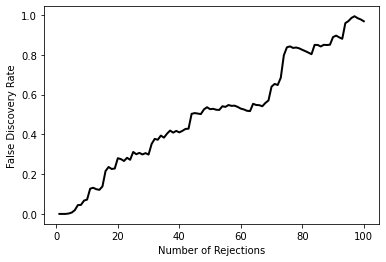

In [35]:
plt.plot(Rs, FDRs, 'k-', lw=2)
plt.xlabel('Number of Rejections')
plt.ylabel('False Discovery Rate')
plt.show()

In [ ]:
# End of Chapter 13